# Graphe des tailles d'échantillons

In [1]:
import codecs,math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.transforms as transforms
from datetime import datetime
from IPython.display import display

In [2]:
%matplotlib inline

#### Choix du style de plot

In [3]:
import seaborn as sns
sns.set_style("darkgrid")
sns.set_context("paper", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.set_palette("hls")
sns.set_color_codes("muted")
#sns.palplot(sns.color_palette("hls", 8))
#sns.palplot(sns.color_palette("husl", 8))

### Routines de formatages des axes matplotlib

In [4]:
def reFormatTicks(x,pos):
    text="0"
    if x!=0:
        magnitude=int(np.log10(x))
        x=round(float(x)/(10**magnitude),1)*10**magnitude
        if magnitude>=9:
            unit="G"
            value=("%.1f"%(float(x)/1e9)).strip("0").strip(".")
        elif magnitude>=6:
            unit="M"
            value=("%.1f"%(float(x)/1e6)).strip("0").strip(".")
        elif magnitude>=3:
            unit="k"
            value=("%.1f"%(float(x)/1e3)).strip("0").strip(".")
        else:
            unit=""
            value=("%.1f"%float(x)).strip("0").strip(".")
        text="%s%s"%(value,unit)
    return text

def Mois2Annees(x,pos):
    return int(x/12)


## Lecture du tableau des échantillons


In [20]:
fSampleSizes="ZipfCoefTokensTypes-Verbes.csv"
SampleSizes=pd.read_csv(fSampleSizes,sep="\t",index_col=0,dtype=np.int64)

In [56]:
SampleSizes["mean"]=SampleSizes.mean(axis=1)
SampleSizes.tail()

,1.01,1.02,1.03,1.04,1.05,1.06,1.07,1.08,1.09,1.1,...,1.12,1.13,1.14,1.15,1.16,1.17,1.18,1.19,1.2,mean
100000000,82030,81780,81716,82287,81992,82474,82664,82306,81978,82084,...,81686,81451,80986,80986,80131,80393,79168,78847,77696,81247.75
200000000,83217,82945,82754,83055,83401,82692,83179,82633,83473,83536,...,82998,83023,83123,82863,82754,82545,82052,81759,82349,82866.70
300000000,82789,82665,82729,82446,82898,82905,82385,83503,83279,83222,...,83143,83092,82712,83424,82814,83031,82750,82940,82798,82934.50
400000000,83197,83340,83091,83319,82784,83137,83146,83099,83290,83002,...,83478,83594,83075,83386,82996,83193,82925,82732,82944,83135.40
500000000,83096,83244,82801,82975,82703,83003,83248,82993,83279,83563,...,83160,82879,83166,83352,82643,83212,82972,82793,83018,83056.05


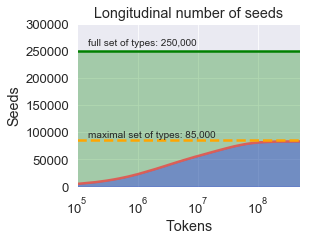

In [287]:
ax=SampleSizes["mean"].plot(figsize=(4,3))
ax.set(xscale="log",yscale="linear",xlabel="Tokens",
       ylabel=u"Seeds",title="Longitudinal number of seeds",
       xlim=(100000,500000000),
      ylim=(0,300000))
plt.fill_between(SampleSizes["mean"].index, 250000, color='green', alpha=0.3)
plt.fill_between(SampleSizes["mean"].index, SampleSizes["mean"], color='blue', alpha=0.3)
plt.axhline(y=250000,color="green")
plt.axhline(y=85000,color="orange",linestyle="dashed")
plt.text(150000, 90000, 'maximal set of types: 85,000',size=10)
plt.text(150000, 260000, 'full set of types: 250,000',size=10)
plt.savefig("TokenTypes.png",transparent=True, dpi=300, bbox_inches='tight')

# Graphes de résultats

In [80]:
import yaml

#### Nested dicts as dataframe
https://stackoverflow.com/questions/24988131/nested-dictionary-to-multiindex-dataframe-where-dictionary-keys-are-column-label

In [276]:
repResults="/Users/gilles/pCloud Drive/FOD/GB/2015-Data/Longitudinales/"
with open(repResults+"Longitudinal-X-Resultats-Recalcul.yaml", 'r') as stream:
        results=yaml.load(stream,Loader=yaml.FullLoader)

In [277]:
dfResults=pd.DataFrame.from_dict({(outerKey, innerKey): values for outerKey, innerDict in results.iteritems() for innerKey, values in innerDict.iteritems()}).T

In [278]:
dfResults.reset_index(inplace=True)

In [279]:
dfResults["tokens"]=dfResults["level_0"].str.extract("T(\d+)-")
dfResults["tokens"]=dfResults["tokens"].astype(int)
dfResults["paradigm"]=dfResults["level_0"].str.extract("(Morphomes)")
dfResults["paradigm"]=dfResults["paradigm"].replace(np.nan,"Syntax")

In [280]:
dfResults.set_index(["level_1","paradigm","tokens"],inplace=True)
dfResults

,,,level_0,F-Measure,FP,OG,Precision,Recall,TP,UG,nbGoldForms,nbInitialForms,nbLexemes
level_1,paradigm,tokens,,,,,,,,,,,
Swim1,Syntax,10000,00-T10000-F3663-X,0.270077,495.0,123.0,0.932259,0.157912,8505.0,45354.0,53859.0,3663.0,1289.0
Swim2,Syntax,10000,00-T10000-F3663-X,0.434340,1575.0,298.0,0.891946,0.287064,15461.0,38398.0,53859.0,3663.0,1289.0
Swim1,Morphomes,10000,00-T10000-F3663-X-Morphomes,0.408813,5175.0,186.0,0.739454,0.282497,15215.0,38644.0,53859.0,3663.0,1289.0
Swim2,Morphomes,10000,00-T10000-F3663-X-Morphomes,0.528607,8706.0,365.0,0.713659,0.419763,22608.0,31251.0,53859.0,3663.0,1289.0
Swim1,Syntax,20000,01-T20000-F5816-X,0.358491,716.0,262.0,0.945448,0.221178,16950.0,59685.0,76635.0,5816.0,1770.0
Swim2,Syntax,20000,01-T20000-F5816-X,0.530099,1966.0,501.0,0.920404,0.372245,28527.0,48108.0,76635.0,5816.0,1770.0
Swim1,Morphomes,20000,01-T20000-F5816-X-Morphomes,0.550317,7630.0,482.0,0.798625,0.419795,32171.0,44464.0,76635.0,5816.0,1770.0
Swim2,Morphomes,20000,01-T20000-F5816-X-Morphomes,0.655828,10970.0,691.0,0.786979,0.562145,43080.0,33555.0,76635.0,5816.0,1770.0
Swim1,Syntax,30000,02-T30000-F7497-X,0.426718,682.0,401.0,0.957862,0.274503,24618.0,65064.0,89682.0,7497.0,2043.0


In [281]:
dfResults.loc[("Swim1","Syntax")]["Precision"].sort_index()

/Users/gilles/opt/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


tokens
10000        0.932259
20000        0.945448
30000        0.957862
40000        0.956596
50000        0.956497
60000        0.959979
70000        0.961545
80000        0.962861
90000        0.959317
100000       0.962000
110000       0.962058
120000       0.962434
130000       0.963158
140000       0.965324
150000       0.965226
160000       0.966318
170000       0.966607
180000       0.965753
190000       0.965983
200000       0.966688
210000       0.967482
220000       0.967163
230000       0.966578
240000       0.965723
250000       0.966554
260000       0.967332
270000       0.969088
280000       0.969419
290000       0.969107
300000       0.970330
               ...   
11000000     0.973435
12000000     0.973078
13000000     0.972676
14000000     0.972840
15000000     0.972918
16000000     0.972998
17000000     0.972943
18000000     0.972942
19000000     0.972964
20000000     0.972963
21000000     0.972984
22000000     0.973060
23000000     0.972931
24000000     0.972919
250

/Users/gilles/opt/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
/Users/gilles/opt/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/gilles/opt/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gilles/opt/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.


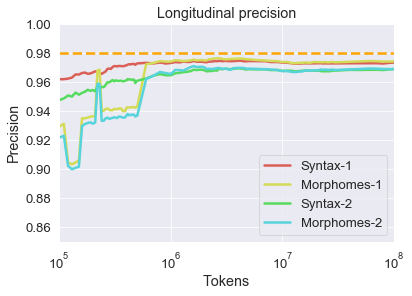

In [282]:
ax=dfResults.loc[("Swim1","Syntax")]["Precision"].sort_index().plot()
dfResults.loc[("Swim1","Morphomes")]["Precision"].sort_index().plot(ax=ax)
dfResults.loc[("Swim2","Syntax")]["Precision"].sort_index().plot(ax=ax)
dfResults.loc[("Swim2","Morphomes")]["Precision"].sort_index().plot(ax=ax)


ax.set(xscale="log",yscale="linear",xlabel="Tokens",
       ylabel=u"Precision",title="Longitudinal precision",
        xlim=(100000,100000000),
      ylim=(0.85,1))
ax.legend(["Syntax-1","Morphomes-1","Syntax-2","Morphomes-2"])
plt.axhline(y=0.98,color="orange",linestyle="dashed")

plt.savefig("Precision.png",transparent=False, dpi=300, bbox_inches='tight')


/Users/gilles/opt/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
/Users/gilles/opt/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/gilles/opt/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gilles/opt/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.


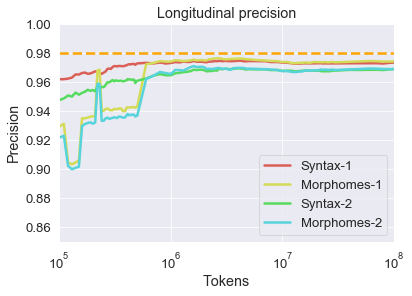

In [283]:
ax=dfResults.loc[("Swim1","Syntax")]["Precision"].sort_index().plot()
dfResults.loc[("Swim1","Morphomes")]["Precision"].sort_index().plot(ax=ax)
dfResults.loc[("Swim2","Syntax")]["Precision"].sort_index().plot(ax=ax)
dfResults.loc[("Swim2","Morphomes")]["Precision"].sort_index().plot(ax=ax)


ax.set(xscale="log",yscale="linear",xlabel="Tokens",
       ylabel=u"Precision",title="Longitudinal precision",
        xlim=(100000,100000000),
      ylim=(0.85,1))
ax.legend(["Syntax-1","Morphomes-1","Syntax-2","Morphomes-2"])
plt.axhline(y=0.98,color="orange",linestyle="dashed")

plt.savefig("Precision.png",transparent=False, dpi=300, bbox_inches='tight')


/Users/gilles/opt/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.
/Users/gilles/opt/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: indexing past lexsort depth may impact performance.
  
/Users/gilles/opt/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:3: PerformanceWarning: indexing past lexsort depth may impact performance.
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/gilles/opt/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: indexing past lexsort depth may impact performance.
  after removing the cwd from sys.path.


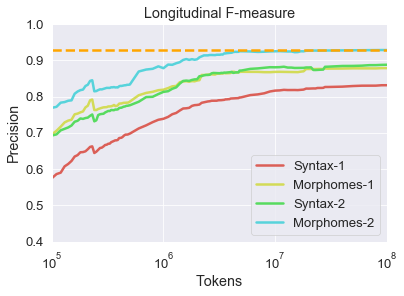

In [284]:
ax=dfResults.loc[("Swim1","Syntax")]["F-Measure"].sort_index().plot()
dfResults.loc[("Swim1","Morphomes")]["F-Measure"].sort_index().plot(ax=ax)
dfResults.loc[("Swim2","Syntax")]["F-Measure"].sort_index().plot(ax=ax)
dfResults.loc[("Swim2","Morphomes")]["F-Measure"].sort_index().plot(ax=ax)


ax.set(xscale="log",yscale="linear",xlabel="Tokens",
       ylabel=u"Precision",title="Longitudinal F-measure",
        xlim=(100000,100000000),
      ylim=(0.4,1))
ax.legend(["Syntax-1","Morphomes-1","Syntax-2","Morphomes-2"])
plt.axhline(y=0.93,color="orange",linestyle="dashed")

plt.savefig("F-Measure.png",transparent=False, dpi=300, bbox_inches='tight')



In [285]:
dfResults.loc[("Swim2","Morphomes")]["F-Measure"].sort_index()

/Users/gilles/opt/anaconda3/envs/python2/lib/python2.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


tokens
10000        0.528607
20000        0.655828
30000        0.672643
40000        0.702191
50000        0.701235
60000        0.719245
70000        0.743416
80000        0.750691
90000        0.755183
100000       0.769087
110000       0.771886
120000       0.783419
130000       0.784996
140000       0.788634
150000       0.789811
160000       0.808002
170000       0.814166
180000       0.817902
190000       0.819413
200000       0.829384
210000       0.832882
220000       0.843433
230000       0.845238
240000       0.814732
250000       0.815402
260000       0.818094
270000       0.820177
280000       0.819954
290000       0.821380
300000       0.822889
               ...   
11000000     0.925465
12000000     0.925048
13000000     0.924560
14000000     0.924682
15000000     0.922596
16000000     0.922955
17000000     0.925219
18000000     0.924976
19000000     0.926559
20000000     0.926885
21000000     0.926921
22000000     0.927109
23000000     0.926964
24000000     0.927057
250